In [12]:
from qd_rdf import get_dots2, data_path, plot_rdf
import numpy as np

In [13]:
data_path = './'

In [14]:
print(dir(qd_rdf))

rdfs = []


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '__warningregistry__', 'box', 'color', 'data_path', 'density', 'filters', 'freud', 'get_dots2', 'io', 'measure', 'ndimage', 'np', 'os', 'peak_local_max', 'plot_rdf', 'plt', 'rescale_intensity', 'stats', 'xlrd']


In [ ]:
L=5
R=[]
dots=get_dots2(data_path+"106/5a.tif",compare=True,microns=L,size=3, spacing=1)
b=1/np.sqrt(len(dots)/(L*1000*1000*L))
print(b)
R.append(b)

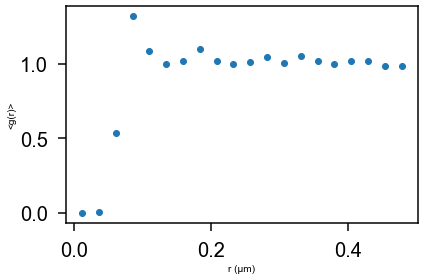

In [4]:
rdfs.append(plot_rdf(dots,L,plot=True)[1])


<ipython-input-1-079723abf359>:15: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image = color.rgb2gray(io.imread(file))


99.01475429766744


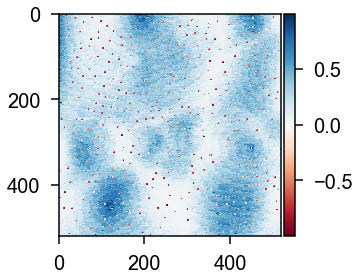

In [5]:
L=2
dots=get_dots2("106/2a.tif",compare=True, microns =L,size=4, spacing=10)
b=1/np.sqrt(len(dots)/(L*1000*1000*L))
print(b)
R.append(b)

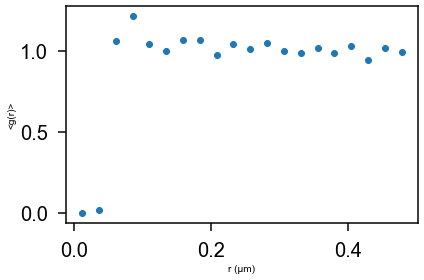

In [6]:
rdfs.append(plot_rdf(dots,L,plot=True)[1])


<ipython-input-1-079723abf359>:15: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image = color.rgb2gray(io.imread(file))


100.75854437197567


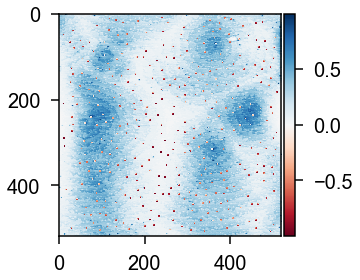

In [7]:
dots=get_dots2("106/2b.tif",compare=True, microns =L,size=4 ,spacing=10)
b=1/np.sqrt(len(dots)/(L*1000*1000*L))
print(b)
R.append(b)

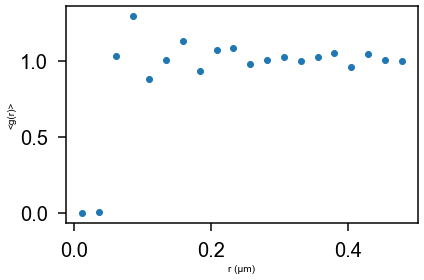

In [8]:
rdfs.append(plot_rdf(dots,L,plot=True)[1])


<ipython-input-1-079723abf359>:15: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image = color.rgb2gray(io.imread(file))


97.24332766526304


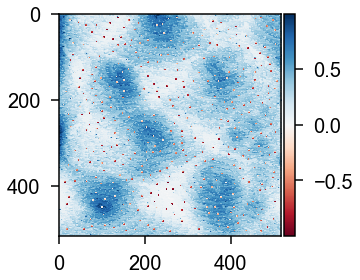

In [9]:
dots=get_dots2("106/2c.tif",compare=True, microns =L, size=4, spacing=10)
b=1/np.sqrt(len(dots)/(L*1000*1000*L))
print(b)
R.append(b)

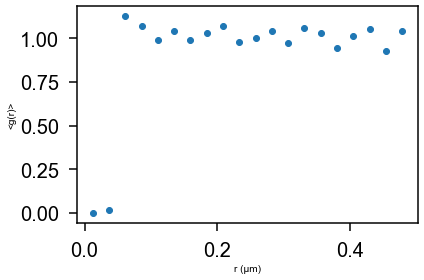

In [10]:
rdfs.append(plot_rdf(dots,L,plot=True)[1])


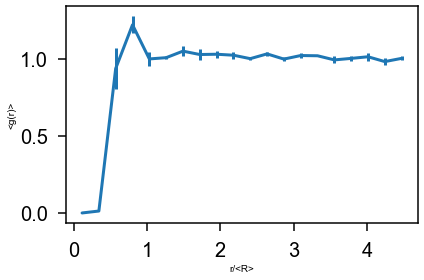

In [11]:
rdfs = np.asarray(rdfs)
mean_count = np.mean(rdfs,axis=0)
sem =  stats.sem(rdfs, axis=0, ddof=1)
r,rdf = plot_rdf(dots,L,plot=False)
plt.errorbar(1000*r/np.mean(R), mean_count, yerr=sem)
#plt.xlabel("r (μm)")
plt.xlabel("r/<R>")
plt.ylabel("<g(r)>")
plt.savefig("M106.png")
np.savetxt("M106.csv",(1000*r/np.mean(R),mean_count,sem),delimiter=',')
plt.show()

In [12]:
R

[130.27726451049213, 99.01475429766744, 100.75854437197567, 97.24332766526304]

In [13]:
print(np.mean(R),np.std(R))

106.82347271134958 13.597968303091294
